In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, shapiro, ttest_ind
from itertools import combinations

import time

# Configuración General
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 8})

In [95]:
df = pd.read_csv('../data/dataset_SCL.csv')

/var/folders/q4/hqn7rgnd2776w9b_lc4r0vlr0000gn/T/ipykernel_3468/3157898594.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/dataset_SCL.csv')


In [96]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### Preprocesamiento

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [98]:
# Transformar variables de fecha de string a datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

# Agregar Variable Fecha
df['fecha'] = df['Fecha-I'].dt.date

In [99]:
df.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,fecha
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-22
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,2017-12-25
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,2017-12-27
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-29
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima,2017-12-31


### EDA

#### Variables de Fecha

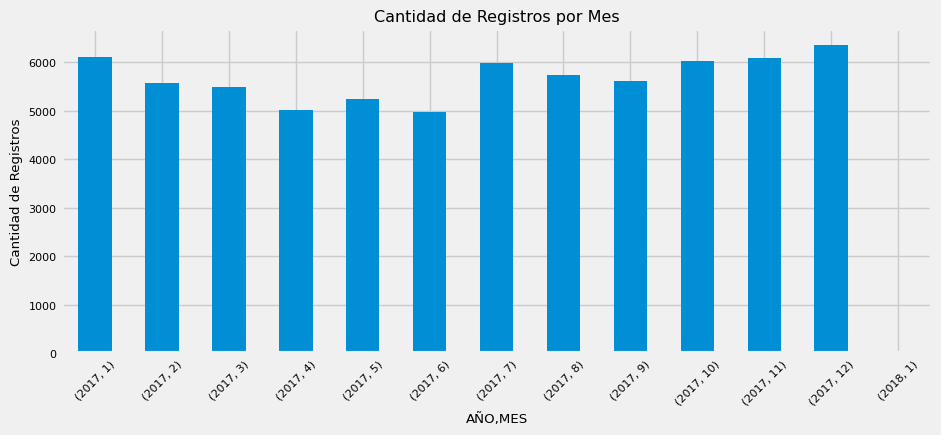

In [100]:
df.groupby(['AÑO','MES']).count()['Fecha-I'].plot(kind='bar', figsize=(10,4), legend=False, rot=45)
plt.title('Cantidad de Registros por Mes')
plt.ylabel('Cantidad de Registros')
plt.show()

### Feature Engineering

In [101]:
# Agregar Variable Fecha
df['fecha'] = df['Fecha-I'].dt.date

In [190]:
def temporada_alta(fecha_i):
    month = fecha_i.month
    day = fecha_i.day
    
    # Temporada Alta 1
    if (month==12 and day>=15) or (month<3) or (month==3 and day<=3):
        return 1
    
    # Temporada Alta 2
    elif month==7 and (15<=day<=31):
        return 2
    
    # Temporada Alta 3
    elif month==9 and (11<=day<=30):
        return 3
    
    else:
        return 0
        
df['temporada_alta'] = df['Fecha-I'].apply(temporada_alta)

In [253]:
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).apply(lambda x: x.total_seconds() / 60)

In [255]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,OPERA,SIGLAORI,SIGLADES,fecha,dif_min,temporada_alta,atraso_15,periodo_dia,vuelos_programados,vuelos_programados_aerolinea
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,2017-01-01,3.0,1,0,noche,170,3
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,2017-01-02,9.0,1,0,noche,198,3
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,2017-01-03,9.0,1,0,noche,195,3
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,2017-01-04,3.0,1,0,noche,193,3
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,2017-01-05,-2.0,1,0,noche,196,3


In [191]:
df['atraso_15'] = df['dif_min'].apply(lambda x: 1 if x>15 else 0)

In [192]:
def periodo_dia(fecha_i):
    flight_time = fecha_i.hour
    
    if 5 <= flight_time < 12:
        return 'mañana'
    elif 12 <= flight_time < 19:
        return 'tarde'
    else:
        return 'noche'
    
df['periodo_dia'] = df['Fecha-I'].apply(periodo_dia)

In [193]:
df[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']].to_csv('../data/output/synthetic_features.csv')

### EDA

#### Variables de Fecha

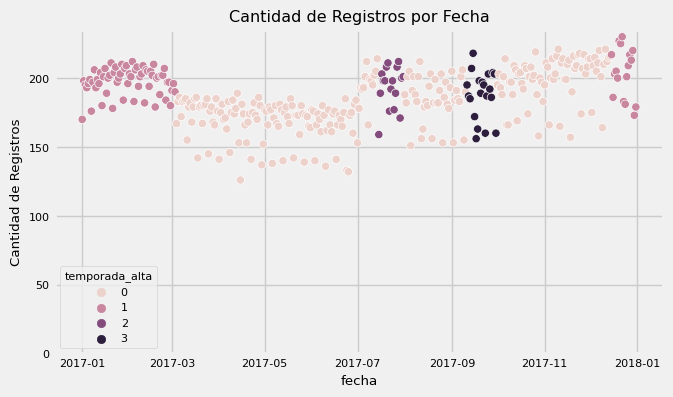

In [194]:
flights_number = df.groupby(['fecha', 'temporada_alta']).count()['Fecha-I'].reset_index()
flights_number.rename(columns={'Fecha-I':'vuelos_programados'}, inplace=True)


plt.figure(figsize=(7,4))
sns.scatterplot(data=flights_number, x='fecha', y='vuelos_programados', hue='temporada_alta')
plt.title('Cantidad de Registros por Fecha')
plt.ylabel('Cantidad de Registros')
plt.ylim(0)
plt.show()

Text(0, 0.5, 'Cantidad de Vuelos')

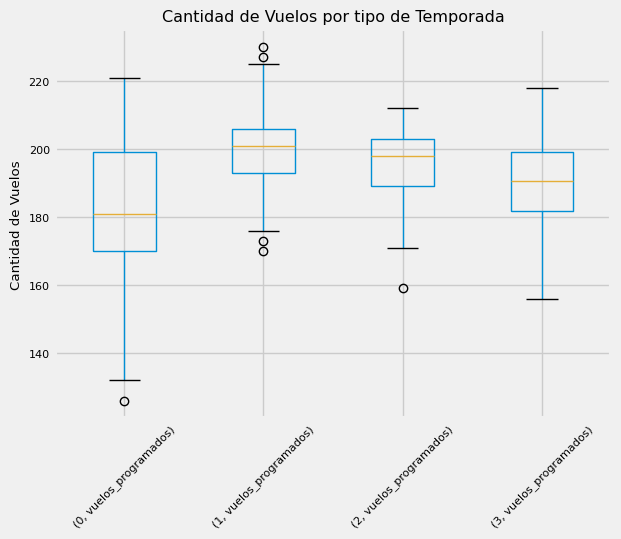

In [249]:
flights_number.groupby('temporada_alta')[['vuelos_programados']].boxplot(subplots=False, rot=45)
plt.title('Cantidad de Vuelos por tipo de Temporada')
plt.ylabel('Cantidad de Vuelos')

El flag `temporada_alta`no siempre representa un comportamiento más alto de lo normal. Esta variable podría ser de interés si es que representara efectivamente momentos de alta demanda (vuelos). Una buena opción, para no perder la información de la "demanda", sería crear una variable que permita modelar este fenómeno, para ello se propone la variable cuantitativa discreta `vuelos_programados` que asocia a cada vuelo con el número de vuelos programados para la fecha `Fecha-I`.

In [238]:
for temporada in [0,1,2,3]:
    vuelos = flights_number.query(f'temporada_alta == {temporada}')['vuelos_programados']
    
    stat, pvalue = shapiro(vuelos)
    
    print(f'[Shapiro-Wilk] Test de Normalidad Cantidad de Vuelos Temporada {temporada} -> (stat: {stat:f}, pvalue: {pvalue:f})')
    

[Shapiro-Wilk] Test de Normalidad Cantidad de Vuelos Temporada 0 -> (stat: 0.979083, pvalue: 0.000990)
[Shapiro-Wilk] Test de Normalidad Cantidad de Vuelos Temporada 1 -> (stat: 0.975746, pvalue: 0.137096)
[Shapiro-Wilk] Test de Normalidad Cantidad de Vuelos Temporada 2 -> (stat: 0.917251, pvalue: 0.132676)
[Shapiro-Wilk] Test de Normalidad Cantidad de Vuelos Temporada 3 -> (stat: 0.928816, pvalue: 0.146518)


In [247]:
vuelos_temporada = []
for temporada in [0,1,2,3]:
    vuelos = flights_number.query(f'temporada_alta == {temporada}')['vuelos_programados']
    vuelos_temporada.append(np.array(vuelos))
    
anova_stat, anova_pvalue = f_oneway(vuelos_temporada[0], vuelos_temporada[1], vuelos_temporada[2], vuelos_temporada[3])
kruskal_stat, kruskal_pvalue = kruskal(vuelos_temporada[0], vuelos_temporada[1], vuelos_temporada[2], vuelos_temporada[3])

print(f'ANOVA Test: {anova_stat, anova_pvalue}')
print(f'Kruskal-Wallis Test: {kruskal_stat, kruskal_pvalue}')

ANOVA Test: (16.30299666733017, 5.867972367085792e-10)
Kruskal-Wallis Test: (43.46872493438663, 1.95695949750133e-09)


In [248]:
combinacion_temporadas = [x for x in combinations([0,1,2,3], 2)]

for x in combinacion_temporadas:
    
    grupo_1 = x[0]
    grupo_2 = x[1]
    
    vuelos_grupo_1 = flights_number.query(f'temporada_alta == {grupo_1}')['vuelos_programados']
    vuelos_grupo_2 = flights_number.query(f'temporada_alta == {grupo_2}')['vuelos_programados']
    
    t_stat, t_pvalue = ttest_ind(vuelos_grupo_1, vuelos_grupo_2)
    
    print(f'Temporada {grupo_1} - Temporada {grupo_2} -> (stat: {t_stat:f}, pvalue: {t_pvalue:f})')

Temporada 0 - Temporada 1 -> (stat: -6.738937, pvalue: 0.000000)
Temporada 0 - Temporada 2 -> (stat: -2.173858, pvalue: 0.030604)
Temporada 0 - Temporada 3 -> (stat: -1.132089, pvalue: 0.258613)
Temporada 1 - Temporada 2 -> (stat: 1.582079, pvalue: 0.116991)
Temporada 1 - Temporada 3 -> (stat: 3.302764, pvalue: 0.001341)
Temporada 2 - Temporada 3 -> (stat: 1.051278, pvalue: 0.300336)


In [107]:
vuelos_programados = df.groupby('fecha').count()['Fecha-I'].reset_index()
vuelos_programados.rename(columns={'Fecha-I':'vuelos_programados'}, inplace=True)
vuelos_programados.head()

,fecha,vuelos_programados
0,2017-01-01,170
1,2017-01-02,198
2,2017-01-03,195
3,2017-01-04,193
4,2017-01-05,196


In [108]:
vuelos_programados_aerolinea = df.groupby(['fecha', 'OPERA']).count()['Fecha-I'].reset_index()
vuelos_programados_aerolinea.rename(columns={'Fecha-I':'vuelos_programados_aerolinea'}, inplace=True)
vuelos_programados_aerolinea.head()

,fecha,OPERA,vuelos_programados_aerolinea
0,2017-01-01,Aerolineas Argentinas,4
1,2017-01-01,Aeromexico,1
2,2017-01-01,Air Canada,2
3,2017-01-01,Air France,1
4,2017-01-01,Alitalia,1


In [109]:
df = df.merge(vuelos_programados, on='fecha', how='left')
df = df.merge(vuelos_programados_aerolinea, on=['fecha','OPERA'], how='left')
df[['Fecha-I', 'OPERA', 'SIGLAORI', 'SIGLADES', 'dif_min', 'vuelos_programados', 'vuelos_programados_aerolinea']]

,Fecha-I,OPERA,SIGLAORI,SIGLADES,dif_min,vuelos_programados,vuelos_programados_aerolinea
0,2017-01-01 23:30:00,American Airlines,Santiago,Miami,3.0,170,3
1,2017-01-02 23:30:00,American Airlines,Santiago,Miami,9.0,198,3
2,2017-01-03 23:30:00,American Airlines,Santiago,Miami,9.0,195,3
3,2017-01-04 23:30:00,American Airlines,Santiago,Miami,3.0,193,3
4,2017-01-05 23:30:00,American Airlines,Santiago,Miami,-2.0,196,3
...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,JetSmart SPA,Santiago,Lima,46.0,230,13
68202,2017-12-25 14:55:00,JetSmart SPA,Santiago,Lima,16.0,201,14
68203,2017-12-27 14:55:00,JetSmart SPA,Santiago,Lima,40.0,217,14
68204,2017-12-29 14:55:00,JetSmart SPA,Santiago,Lima,13.0,220,13


In [115]:
df[['vuelos_programados', 'vuelos_programados_aerolinea']].corr()

,vuelos_programados,vuelos_programados_aerolinea
vuelos_programados,1.000000,0.170997
vuelos_programados_aerolinea,0.170997,1.000000


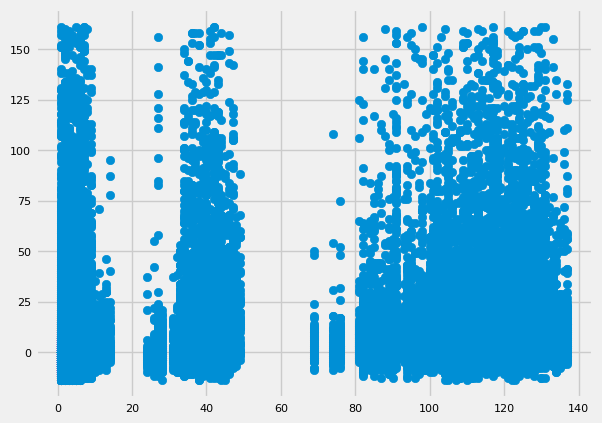

In [111]:
plt.scatter(df.vuelos_programados_aerolinea, df.dif_min)

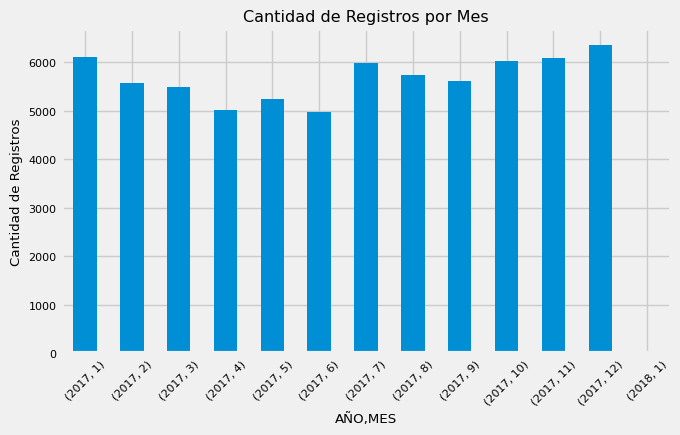

In [69]:
df.groupby(['AÑO','MES']).count()['Fecha-I'].plot(kind='bar', figsize=(7,4), legend=False, rot=45)
plt.title('Cantidad de Registros por Mes')
plt.ylabel('Cantidad de Registros')
plt.show()